# **Neural Networks Project**

**PART - B**

**Import Libraries:**

In [37]:
# used to supress display of warnings
import warnings

# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split

# StanderScaler is a function in Sklearn preprocessing that standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# TensorFlow is a software library for deep learning, a branch of artificial intelligence that uses neural networks with many hidden layers
import tensorflow as tf
import keras

# tensorflow.keras is a class in TensorFlow that allows you to create a Sequential model for a plain stack of layers where each layer has exactly one input tensor and one output tensor1.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten

from tensorflow.keras import optimizers

import random
from tensorflow.keras import backend


In [38]:
tf.__version__ # To get the version of the tensforflow

'2.13.0'

**2.1 a - Read the .h5 file and assign to a variable.**

In [39]:
import h5py

# Open the file as readonly
h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

**2.1 b - Print all the keys from the .h5 file.**

In [40]:
h5f.keys() # To print all the keys in the .h5 file

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

**2.1 c - Split the data into X_train, X_test, Y_train, Y_test**

In [41]:
# Load the training, test and validation set
# [:] at the end of the line reads the data from the dataset into a NumPy array
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

**2.2 a - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync..**

In [42]:
X_train.shape

(42000, 32, 32)

In [43]:
y_train.shape

(42000,)

In [44]:
X_test.shape

(18000, 32, 32)

In [45]:
y_test.shape

(18000,)

In [46]:
# Using assert statements for verifying whether Train and Test Data are in syn or not
assert X_train.shape[0] == y_train.shape[0], "Number of samples in X_train and Y_train do not match"
assert X_test.shape[0] == y_test.shape[0], "Number of samples in X_test and Y_test do not match"

print("Train and test data are in sync")

Train and test data are in sync


In [47]:
#################################### OR #######################################

In [48]:
# Using if _ else loop, for verifying whether Train and Test Data are in syn or not
if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("Train and test data are in sync")
else:
    print("Train and test data are not in sync")

Train and test data are in sync


**2.2 b - Visualise first 10 images in train data and print its corresponding labels..**

In [49]:
def img_lab(n):
    plt.figure(figsize=(n, 1))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_train[i], cmap="gray")
        plt.axis('off')
    plt.show()
    print('label for each of the above image: %s' % (y_train[0:n]))

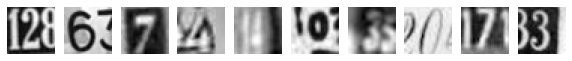

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [50]:
img_lab(10)

**2.2 c - Reshape all the images with appropriate shape update the data in same variable.**

In [51]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

**2.2 d - Normalise the images i.e. Normalise the pixel values.**

In [52]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


**2.2 e - Transform Labels into format acceptable by Neural Network**

In [53]:
# Using One Hot Encoding i.e by creating the dummy variables
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

**2.2 f - Print total Number of classes in the Dataset.**

In [54]:
# Total no.of classes
num_classes = y_test.shape[1]
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


**2.3 a - Design a Neural Network to train a classifier.**

In [55]:
# Clearing the session in Keras
backend.clear_session()
# To receive the same output everytime
# Fixing the seed for NumPy random number generators to 42
np.random.seed(42)
# Fixing the set the seed for the Python random number generator to 42
import random
random.seed(42)
# Fixing the seed for the TensorFlow random number generator to 42
tf.random.set_seed(42)

In [56]:
def nn_model():
    # create model
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [57]:
# build the model
model = nn_model()

**2.3 b -Train the classifier using previously designed Architecture (Use best suitable parameters).**

In [58]:
# Compile model
sgd = optimizers.Adam(learning_rate=1e-3)
# Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [59]:
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 6s - loss: 2.3010 - accuracy: 0.1103 - val_loss: 2.2635 - val_accuracy: 0.1537 - 6s/epoch - 46ms/step
Epoch 2/100
140/140 - 3s - loss: 1.9797 - accuracy: 0.2915 - val_loss: 1.6688 - val_accuracy: 0.4088 - 3s/epoch - 21ms/step
Epoch 3/100
140/140 - 3s - loss: 1.5990 - accuracy: 0.4458 - val_loss: 1.4678 - val_accuracy: 0.5116 - 3s/epoch - 22ms/step
Epoch 4/100
140/140 - 4s - loss: 1.4032 - accuracy: 0.5369 - val_loss: 1.3183 - val_accuracy: 0.5673 - 4s/epoch - 25ms/step
Epoch 5/100
140/140 - 4s - loss: 1.2752 - accuracy: 0.5874 - val_loss: 1.2487 - val_accuracy: 0.5937 - 4s/epoch - 25ms/step
Epoch 6/100
140/140 - 3s - loss: 1.2061 - accuracy: 0.6168 - val_loss: 1.1902 - val_accuracy: 0.6211 - 3s/epoch - 24ms/step
Epoch 7/100
140/140 - 3s - loss: 1.1501 - accuracy: 0.6380 - val_loss: 1.1214 - val_accuracy: 0.6447 - 3s/epoch - 23ms/step
Epoch 8/100
140/140 - 3s - loss: 1.1249 - accuracy: 0.6451 - val_loss: 1.1240 - val_accuracy: 0.6447 - 3s/epoch - 22ms/step
Epoch 9/

Epoch 67/100
140/140 - 3s - loss: 0.4938 - accuracy: 0.8466 - val_loss: 0.6565 - val_accuracy: 0.8128 - 3s/epoch - 22ms/step
Epoch 68/100
140/140 - 3s - loss: 0.4956 - accuracy: 0.8460 - val_loss: 0.6641 - val_accuracy: 0.8064 - 3s/epoch - 22ms/step
Epoch 69/100
140/140 - 3s - loss: 0.5001 - accuracy: 0.8429 - val_loss: 0.6574 - val_accuracy: 0.8124 - 3s/epoch - 22ms/step
Epoch 70/100
140/140 - 3s - loss: 0.4973 - accuracy: 0.8453 - val_loss: 0.6723 - val_accuracy: 0.8062 - 3s/epoch - 22ms/step
Epoch 71/100
140/140 - 3s - loss: 0.4868 - accuracy: 0.8473 - val_loss: 0.6680 - val_accuracy: 0.8081 - 3s/epoch - 22ms/step
Epoch 72/100
140/140 - 3s - loss: 0.4804 - accuracy: 0.8494 - val_loss: 0.7049 - val_accuracy: 0.8007 - 3s/epoch - 22ms/step
Epoch 73/100
140/140 - 3s - loss: 0.4893 - accuracy: 0.8465 - val_loss: 0.6726 - val_accuracy: 0.8075 - 3s/epoch - 22ms/step
Epoch 74/100
140/140 - 3s - loss: 0.4782 - accuracy: 0.8503 - val_loss: 0.6578 - val_accuracy: 0.8099 - 3s/epoch - 22ms/step


**2.3 c -Evaluate performance of the model with appropriate metrics.**

In [60]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6754052639007568
Accuracy: 0.8101111054420471


In [61]:
y_pred = model.predict(X_test)
y_pred


563/563 [==============================] - 3s 5ms/step


array([[5.94091833e-01, 4.67996486e-02, 8.68559554e-02, ...,
        1.45853490e-01, 5.44128492e-02, 2.20786668e-02],
       [3.18715637e-10, 4.26345185e-04, 8.96269158e-02, ...,
        9.08870935e-01, 4.79534947e-07, 7.03026944e-06],
       [8.10150013e-05, 2.48759079e-05, 9.98276591e-01, ...,
        7.80254340e-05, 1.20846485e-03, 1.11597881e-04],
       ...,
       [8.13602583e-06, 1.48897562e-02, 2.61319731e-03, ...,
        9.81927216e-01, 9.85735915e-06, 9.45946886e-05],
       [1.81633828e-03, 1.13444192e-04, 7.99560081e-03, ...,
        7.74057955e-03, 4.26526628e-02, 8.54946792e-01],
       [4.34215617e-04, 1.04954284e-04, 9.96036470e-01, ...,
        3.13006807e-03, 8.96306665e-05, 3.09282987e-05]], dtype=float32)

In [62]:
y_test = np.array(y_test)
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [63]:
y_pred.shape

(18000, 10)

In [64]:
y_test.shape

(18000, 10)

In [65]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8101111111111111


Confusion Matrix:


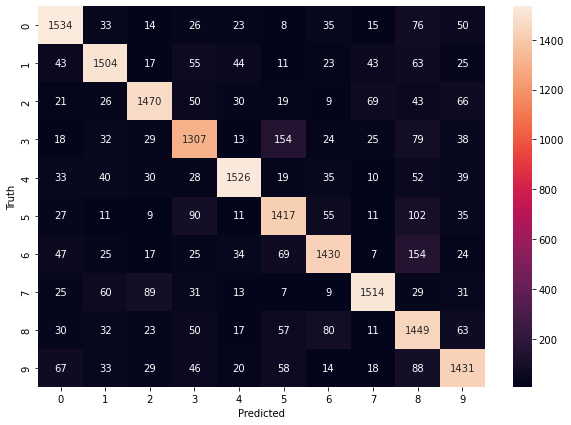

In [66]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [67]:
# Calculate all the metrices using Classification_report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1814
           1       0.84      0.82      0.83      1828
           2       0.85      0.82      0.83      1803
           3       0.77      0.76      0.76      1719
           4       0.88      0.84      0.86      1812
           5       0.78      0.80      0.79      1768
           6       0.83      0.78      0.81      1832
           7       0.88      0.84      0.86      1808
           8       0.68      0.80      0.73      1812
           9       0.79      0.79      0.79      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



**Summary for the Metrics**

- Accuracy: The accuracy of the model on the test set is approximately 0.8101, meaning it correctly predicts the class for about 81.01% of the samples.

- Precision, Recall, F1-score: The precision, recall, and F1-score are provided for each class in the classification report. The weighted average of these metrics is around 0.81, indicating good overall performance.

- Confusion Matrix: The confusion matrix shows the number of correct and incorrect predictions for each class. It allows you to see which classes the model is confusing with others.

**2.3 d - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot**

Text(0.5, 1.0, 'Training and validation loss')

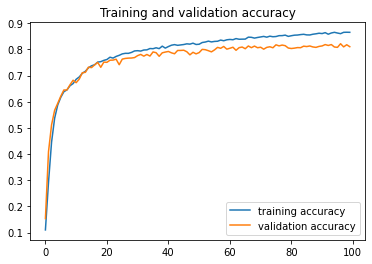

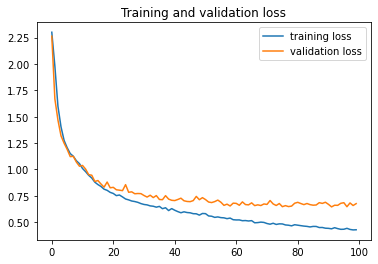

In [68]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

**Observations:**

- There are around 10 classes in the dataset which represent digits from 0-9.

- We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 81.01 %.

- Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

- Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.
